## EAE - Introduction to Programming Languages for Data 
## Assignment 03 - Group Assignment - 10/12/2025


### Instructor:  
Enric Domingo  
edomingod@professional.eae.es


### Students:
- Maria Isabel Ortiz  
- Hyerim Hong
- Julio Jesus Ramirez

## Emails: 
- mortizn@student.eae.es 
- hhong@student.eae.es
- jjesusr@student.eae.es


### Submission Date: 28/12/2025 

## Link of the dataset: 

https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024



### Instructions:

Find a dataset of your interest (you can use Kaggle, UCI Machine Learning Repository, or any other public source). The dataset should be in CSV format and contain between 500 and 2000 rows and between 5 and 10 columns. If you find one with more data, feel free to filter it down to the required size.
Using Python and SQL, perform the following tasks:
1. Share the dataset source link, a brief description of its content and your motivation for choosing it.
2. Load the dataset using Pandas.
3. Make some basic data profiling (statistics about the data, distributions, missing values, etc.) using Pandas methods.
4. Create 2 new useful or interesting columns based on other existing columns in the dataset (e.g., a ratio, a category based on numerical values, etc.).
5. Make 3 interesting observations about the data based on your analysis, using Pandas queries and Matplotlib visualizations. Add storytelling in Markdown cells to explain your findings and why they are interesting/relevant.
6. Using Pandas again, export the modified dataset to a new CSV file.

Similar examples of these tasks are every one of the 3 individual sub-projects of the Final Project, especially the 2nd and 3rd ones.

Don't ask ChatGPT or any other AI tools to generate code for you. You can use them for guidance, but the final code must be your own work!


### Topics Covered:

- Python Basics
- Numpy
- Pandas
- Matplotlib

### Documentation used:

https://pandas.pydata.org/docs/user_guide/indexing.html

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [1]:
# Your Code and Markdown cells from here onwards, feel free to add more cells as needed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# visualization of dataset
ruta = "C:/Users/miona/OneDrive/Documents/Documentos - EAE/Intro to Python/Most Streamed Spotify Songs 2024.csv"
df = pd.read_csv(ruta)
num_filas = df.shape[0]
num_columnas = df.shape[1]

print("Filas:", num_filas)
print("Columnas:", num_columnas)

Filas: 1999
Columnas: 10


In [5]:
for col in ['Spotify Streams', 'Spotify Playlist Reach', 'Track Score', 'Spotify Popularity', 'Spotify Playlist Count']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

df # Display the dataframe

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,3.904709e+08,30716.0,196631588.0,92.0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,3.237039e+08,28113.0,174597137.0,92.0
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,6.013093e+08,54331.0,211607669.0,92.0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,2.031281e+09,269802.0,136569078.0,85.0
4,Houdini,Houdini,Eminem,5/31/2024,5,423.3,1.070349e+08,7223.0,151469874.0,88.0
...,...,...,...,...,...,...,...,...,...,...
1994,Tï¿½ï¿½ï¿½t Bï¿½ï¿½n,Tï¿½ï¿½ï¿½t Bï¿½ï¿½n,Hana Cï¿½ï¿½ï¿½m,1/3/2023,"1,994",32.3,5.585380e+05,63.0,2483.0,30.0
1995,Aigiri Nandini,Numinosum,Nagavalli,2/10/2023,"1,998",32.3,NaN,5.0,4173.0,NaN
1996,Rolex,Rolex,Ayo & Teo,3/15/2017,"1,996",32.3,4.916346e+08,75806.0,13437276.0,62.0
1997,on one tonight,One of Wun,Gunna,5/10/2024,"1,986",32.3,2.865802e+07,4184.0,26150391.0,77.0


In [14]:
# Styling the dataframe
styled_df = df.head(21).style \
    .background_gradient(cmap='Greens', subset=['Spotify Streams']) \
    .highlight_max(color='lightgreen', subset=['Spotify Popularity']) \
    .highlight_min(color='#cd5c5c', subset=['Spotify Popularity']) \
    .format(precision=2) \
    .set_properties(**{'text-align': 'center', 'border': '1px solid black'}) \
    .set_caption("Datafram Styled: Top 20 Songs by Spotify Streams")
styled_df

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26 00:00:00,1,725.40,390470936.00,30716.00,196631588.00,92.00,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04 00:00:00,2,545.90,323703884.00,28113.00,174597137.00,92.00,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19 00:00:00,3,538.40,601309283.00,54331.00,211607669.00,92.00,2024
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12 00:00:00,4,444.90,2031280633.00,269802.00,136569078.00,85.00,2023
4,Houdini,Houdini,Eminem,2024-05-31 00:00:00,5,423.30,107034922.00,7223.00,151469874.00,88.00,2024
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10 00:00:00,6,410.10,670665438.00,105892.00,175421034.00,83.00,2023
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18 00:00:00,7,407.20,900158751.00,73118.00,201585714.00,86.00,2024
7,Gata Only,Gata Only,FloyyMenor,2024-02-02 00:00:00,8,375.80,675079153.00,40094.00,211236940.00,92.00,2024
8,Danza Kuduro - Cover,ııııııııııııııııııııı - ıııııııııııııııııı -,MUSIC LAB JPN,2024-06-09 00:00:00,9,355.70,1653018119.00,1.00,15.00,nan,2024
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23 00:00:00,10,330.60,90676573.00,10400.00,184199419.00,86.00,2024


### Observation

This styled table highlights the top 20 songs by Spotify Streams, using conditional formatting to emphasize key metrics. The gradient applied to the Spotify Streams column makes it easy to identify the most streamed tracks, while the highlighting of Spotify Popularity helps compare popularity scores across songs.

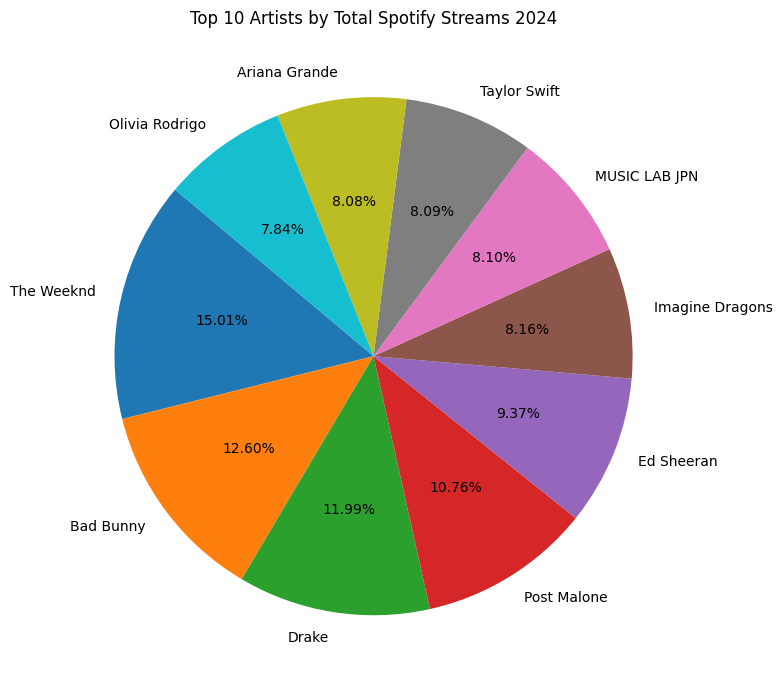

In [7]:
# Top 10 artists by total Spotify streams
top_artists = (
    df.groupby('Artist', dropna=True)['Spotify Streams']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 7))
plt.pie(
    top_artists.values,
    labels=top_artists.index,
    autopct='%1.2f%%',
    startangle=140
)
plt.title("Top 10 Artists by Total Spotify Streams 2024")
plt.tight_layout()
plt.show()


### Observation 
This pie chart shows the distribution of total Spotify streams among the top 10 most streamed artists in 2024. The Weeknd stands out as the most streamed artist, accounting for approximately 15% of the total streams among the top 10, followed by Bad Bunny and Drake.

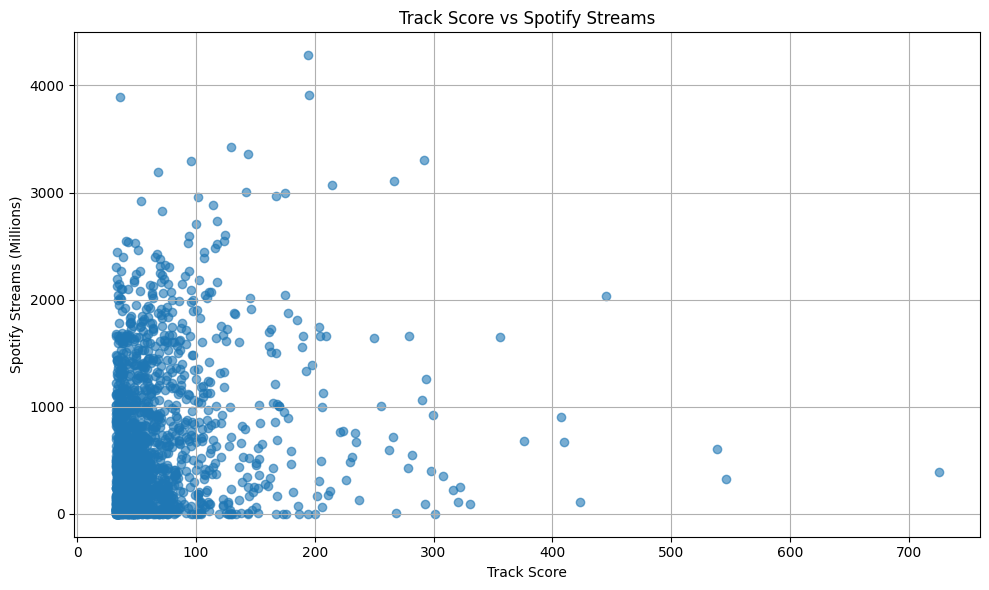

In [16]:
# Scatter plot: Track Score vs Spotify Streams

df['Track Score'] = pd.to_numeric(df['Track Score'], errors='coerce')
df['Spotify Streams'] = pd.to_numeric(df['Spotify Streams'], errors='coerce')

# delete rows with NaN values in either column (MAKE COPY)
scatter_df = df.dropna(subset=['Track Score', 'Spotify Streams']).copy()

# convert Spotify Streams to millions
scatter_df['Spotify Streams (Millions)'] = scatter_df['Spotify Streams'] / 1_000_000

plt.figure(figsize=(10, 6))
plt.scatter(
    scatter_df['Track Score'],
    scatter_df['Spotify Streams (Millions)'],
    alpha=0.6
)

plt.title("Track Score vs Spotify Streams")
plt.xlabel("Track Score")
plt.ylabel("Spotify Streams (Millions)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Observation

The scatter plot shows a weak positive relationship between Track Score and Spotify Streams. The wide dispersion of points indicates that streaming success depends on multiple factors beyond track quality scores.